In [1]:
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(janitor)
library(scales)
options(repr.matrix.max.rows = 6)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
#loading data into R
url_players <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data <- read_csv(url_players)

url_sessions <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
sessions_data <- read_csv(url_sessions)

players_data
sessions_data

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


(1)Data Description
- Data collection: a UBC computer science research group created a Minecraft server and collected player information.

- Players dataset: a dataset that provides information on player data
    - 196 observations
    - 9 variables
    - Variable Types: 
         - Character: experience (players' experience in Minecraft), hashedEmail (players' scrambled email), name (player’s name), gender (player’s gender)
         - Double: played_hours (players' play time), age (player’s age)
         - Logical: subscribe (if the player subscribed to PlaiCraft's email updates), individualId (player’s ID), organizationName (name of the organization the player belongs to)
    - Issues: the individualId and organizationName variables contain NA, so I cannot use these variables.
    - Potential issues: some observations may contain NA, so I will have to account for that in my code.

- Session dataset: a dataset that provides information on player's play sessions
    - 1535 observations
    - 5 variables
    - Variable Types: 
        - Character: hashedEmail (players' scrambled email), start_time (session start time), end_time (session end time)
        - Double: original_start_time (scheduled start times in UNIX timestamp format, representing the number of seconds since January), original_end_time (scheduled end times in UNIX timestamp format)
    - Issues: the start_time and end_time contain both the date and time, so it is not in tidy format

(2)Question

- Can the player age predict the number of hours a player will play using KNN regression?
    - I will wrangle the player dataset only to include the played_hours, name, gender, and age. Then, to address my question, I can apply regression on the played_hours and age data since they are both quantitative variables.


played_hours,name,gender,age
<dbl>,<chr>,<chr>,<dbl>
30.3,Morgan,Male,9
3.8,Christian,Male,17
0.0,Blake,Male,17
⋮,⋮,⋮,⋮
0.0,Dylan,Prefer not to say,17
2.3,Harlow,Male,17
0.2,Ahmed,Other,91


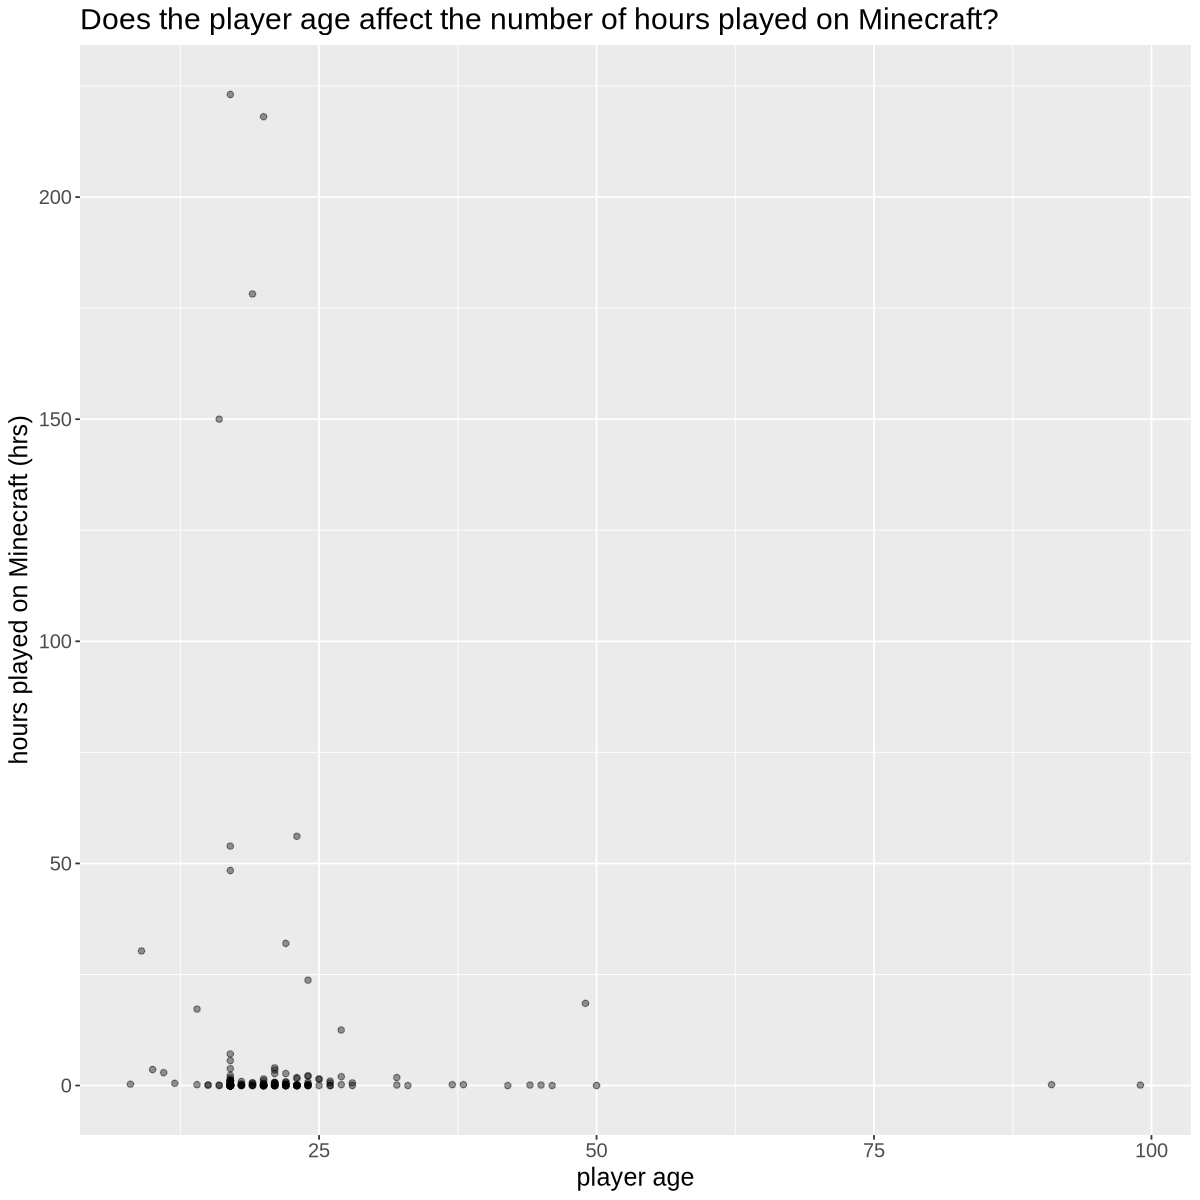

In [3]:
#(3)Exploratory Data Analysis and Visualization

#wrangling players dataset

players_data <- players_data |>
    select(played_hours, name, gender, age)
    
players_data

#data visualization of played_hours vs age
options(repr.plot.width = 10, repr.plot.height = 10)
hours_age_plot <- players_data |>
    ggplot(aes(x = age, y = played_hours)) +
    geom_point(alpha = 0.4) +
    labs(x = "player age", y = "hours played on Minecraft (hrs)", title = "Does the player age affect the number of hours played on Minecraft?") +
    theme(text = element_text(size = 15))
hours_age_plot

(3)Exploratory Data Analysis and Visualization

- I only made one visualization because only the played_hours and player age variables are relevant to my question. 

- The information from the played_hours vs age scatterplot helps address my question because it determines there is a relationship between these variables so predictions could be made(teenagers - 30 year olds have the greatest play hours while there are almost no players above 51).

- Potential problem: there is no data for ages around 51-85, so the predicted play hours for these ages may be inaccurate when using knn-regression.


(5)Methods and Plan

- I will use knn regression to address my question because I want to predict a quantitative variable (play hours). I chose knn rather than linear regression because I am assuming the relationship between play hours and age will be non-linear.
- This method assumes that points closer to each other are similar to each other and ones far apart aren't as similar. A limitation of this model is it depends on its nearest neighbour values, but ages 51-85 have no data, so the prediction for those ages may be skewed.
- To select the model (k), I will compare different k values and pick the one that provides the lowest RMSPE value. I will do this by first splitting the players dataset into 2 subsets (training (70%) and testing data (30%) using initial_split()). Then, I will split the training data into a training set and validation set with 5 folds, and use cross validation to determine the best k value. 